# Distances

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium

In [41]:
df = pd.read_csv('../data/ru_lat_lng_clear.csv')

In [42]:
df.head(2)

,name,country,subcountry,geonameid,lat,lng
0,Udomlya,Russia,Tverskaya,452949,57.876779,35.005110
1,Sosnovka,Russia,St.-Petersburg,461698,56.253352,51.283364


[great circle distance](https://en.wikipedia.org/wiki/Great-circle_distance)

In [43]:
import math
from math import cos, sin, sqrt, atan
def angleDist(lat1, lng1, lat2, lng2):
    lat1 = math.radians(lat1)
    lng1 = math.radians(lng1)
    lat2 = math.radians(lat2)
    lng2 = math.radians(lng2)
    phi1 = lat1
    phi2 = lat2
    dl = (lng1 - lng2)
    n = (sqrt((cos(phi2)*sin(dl))**2
             +(cos(phi1)*sin(phi1)-sin(phi1)*cos(phi2)*cos(dl))**2))
    d = sin(phi1)*sin(phi2)+cos(phi1)*cos(phi2)*cos(dl)
    sigma = atan(n/d)
    
    return sigma

Add ang dist?

In [44]:
mat = pd.crosstab(df['name'], df['name']).astype(float)

In [45]:
for i in range(df.shape[0]):
    for j in range(i + 1, df.shape[0]):
        r1 = df.iloc[i]
        r2 = df.iloc[j]
        dist = angleDist(r1['lat'], r1['lng'], r2['lat'], r2['lng'])
        mat[r1['name']][r2['name']] = dist
        mat[r2['name']][r1['name']] = dist

In [51]:
mat.to_csv('../data/ru_dist_mat.csv')

In [50]:
mat_cpy = mat.copy()

# Dropping large distances

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium

In [53]:
mat = pd.read_csv('../data/ru_dist_mat.csv', index_col='name')

In [67]:
mat.shape

(920, 920)

In [68]:
dist_vals = pd.Series(mat.values.ravel())

In [57]:
dist_vals.shape

(846400,)

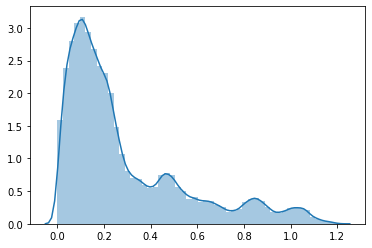

In [58]:
sns.distplot(dist_vals);

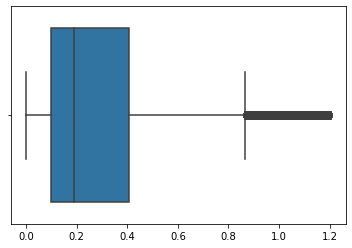

In [59]:
sns.boxplot(dist_vals);

In [60]:
q = dist_vals.quantile(0.80)
print(q)

0.4790178492262378


In [61]:
dist_q = dist_vals[dist_vals < q]

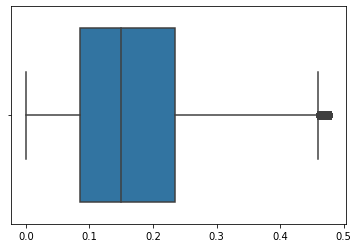

In [62]:
sns.boxplot(dist_q);

In [63]:
dist_q.shape

(677119,)

In [64]:
dist_4 = dist_vals[dist_vals < 0.4]

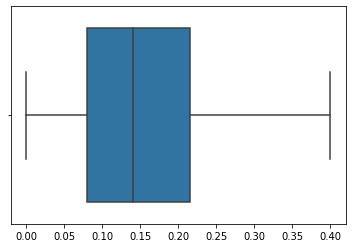

In [65]:
sns.boxplot(dist_4);

In [66]:
dist_4.shape

(631579,)

### Removing edges

In [71]:
mat_cpy = mat.copy()

In [78]:
mat = mat_cpy

In [80]:
for i in range(mat.shape[0]):
    for j in range(i + 1, mat.shape[0]):
        r = mat.iloc[i, j]
        if (r >= 0.4):
            mat.iloc[i, j] = -1

In [84]:
mat.to_csv('../data/ru_dist_mat_v1.csv')